In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정
import matplotlib.pyplot as plt
%matplotlib inline

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

 55000 10000 5000

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


### hyper parameter

In [3]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 30            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [4]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  
T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (black/white)

### 컨볼루션층 1

In [5]:
# 1번째 컨볼루션 층, 5x5x32 필터 
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))  # standard deviation 표준편차 0.01 이내로 뽑음 -> 더 정교한 데이터
b2 = tf.Variable(tf.constant(0.1, shape=[32]))

# 1번째 컨볼루션 연산을 통해 28 x 28 x 1 => 28 x 28 x 32  흑백인 1개 층이 -> 32개 층을 거치게 됨
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 x 28 x 32 => 14 x 14 x 32  max pooling을 통해 4개를 1개로 묶어 가로 세로 2배씩 줄어들게 됨
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 컨볼루션층 2

In [6]:
# 2번째 컨볼루션 층
W3 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev=0.01))  
b3 = tf.Variable(tf.constant(0.1, shape=[64]))   

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 64 
C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 64
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 컨볼루션층 3, pooling 없이

In [7]:
# 3번째 컨볼루션 층
W4 = tf.Variable(tf.random_normal([5, 5, 64, 128], stddev=0.01))  
b4 = tf.Variable(tf.constant(0.1, shape=[128]))   

# 3번째 컨볼루션 연산을 통해 7 X 7 X 64 => 7 X 7 X 128
C4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')

# relu
A4 = Z4 = tf.nn.relu(C4+b4)

### 완전연결층

In [7]:
# 2X2 크기를 가진 256개의 activation map을 flatten 시킴
A4_flat = P4_flat = tf.reshape(A4, [-1, 128*7*7])

### 출력층

In [8]:
# 출력층
W5 = tf.Variable(tf.random_normal([128*7*7, 10], stddev=0.01))
b5 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z6, 즉 softmax 에 들어가는 입력 값
Z5 = logits = tf.matmul(A4_flat, W5) + b5    # 선형회귀 값 Z6

y = A5 = tf.nn.softmax(Z5)

In [9]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z5, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [10]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A5, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A5, 1)

epochs =  0 , step =  0 , loss_val =  3.066192
epochs =  0 , step =  100 , loss_val =  0.39727622
epochs =  0 , step =  200 , loss_val =  0.08721465
epochs =  0 , step =  300 , loss_val =  0.08177072
epochs =  0 , step =  400 , loss_val =  0.09547417
epochs =  0 , step =  500 , loss_val =  0.026863828
epochs =  1 , step =  0 , loss_val =  0.061035022
epochs =  1 , step =  100 , loss_val =  0.040928554
epochs =  1 , step =  200 , loss_val =  0.035153177
epochs =  1 , step =  300 , loss_val =  0.049228955
epochs =  1 , step =  400 , loss_val =  0.015304351
epochs =  1 , step =  500 , loss_val =  0.018362006
epochs =  2 , step =  0 , loss_val =  0.008929018
epochs =  2 , step =  100 , loss_val =  0.04169287
epochs =  2 , step =  200 , loss_val =  0.022195345
epochs =  2 , step =  300 , loss_val =  0.023257902
epochs =  2 , step =  400 , loss_val =  0.013290853
epochs =  2 , step =  500 , loss_val =  0.026021743
epochs =  3 , step =  0 , loss_val =  0.028961213
epochs =  3 , step =  100 , 

epochs =  25 , step =  500 , loss_val =  4.167896e-05
epochs =  26 , step =  0 , loss_val =  5.84477e-05
epochs =  26 , step =  100 , loss_val =  0.00017858991
epochs =  26 , step =  200 , loss_val =  8.547355e-06
epochs =  26 , step =  300 , loss_val =  0.00018973753
epochs =  26 , step =  400 , loss_val =  3.3110366e-05
epochs =  26 , step =  500 , loss_val =  0.000703241
epochs =  27 , step =  0 , loss_val =  0.0008976024
epochs =  27 , step =  100 , loss_val =  2.305021e-05
epochs =  27 , step =  200 , loss_val =  2.175446e-06
epochs =  27 , step =  300 , loss_val =  5.695492e-05
epochs =  27 , step =  400 , loss_val =  1.1777548e-06
epochs =  27 , step =  500 , loss_val =  0.0026929942
epochs =  28 , step =  0 , loss_val =  0.008773381
epochs =  28 , step =  100 , loss_val =  4.768322e-07
epochs =  28 , step =  200 , loss_val =  0.0077557415
epochs =  28 , step =  300 , loss_val =  0.000102116326
epochs =  28 , step =  400 , loss_val =  2.7809333e-06
epochs =  28 , step =  500 , l

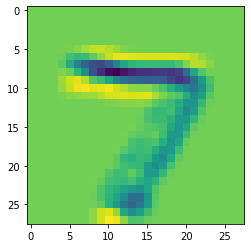

In [12]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 30 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    W2_val, W3_val, W4_val = sess.run([W2, W3, W4], feed_dict={X: test_x_data, T: test_t_data})
    C2_val, C3_val, C4_val = sess.run([C2, C3, C4], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    print('W2_val.shape = ', W2_val.shape, ', W3_val.shape = ', W3_val.shape, ', W4_val.shape = ', W4_val.shape)
    print('C2_val.shape = ', C2_val.shape, ', C3_val.shape = ', C3_val.shape, ', C4_val.shape = ', C4_val.shape)
        
    plt.imshow(C2_val[0, :, :, 12]) # C2에서 0번째 index image의 12번째 filter에 의한 그림 출력 (filter는 32개 있음)
    
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

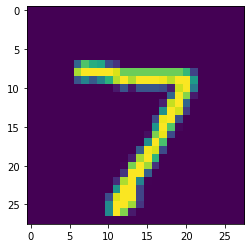

In [13]:
plt.imshow(test_x_data[0].reshape(28, 28))

In [14]:
# index_label_prediction_list
print(index_label_prediction_list)

[[18, 3, 5], [321, 2, 7], [326, 2, 6], [359, 9, 8], [582, 8, 2], [593, 9, 8], [646, 2, 6], [659, 2, 1], [674, 5, 3], [723, 0, 4], [829, 4, 8], [882, 9, 7], [924, 2, 7], [947, 8, 9], [1014, 6, 5], [1039, 7, 1], [1112, 4, 6], [1226, 7, 2], [1232, 9, 4], [1247, 9, 5], [1260, 7, 1], [1337, 2, 6], [1549, 4, 6], [1709, 9, 5], [1878, 8, 3], [1901, 9, 4], [2098, 2, 0], [2118, 6, 1], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2293, 9, 4], [2369, 5, 3], [2387, 9, 1], [2414, 9, 4], [2454, 6, 0], [2462, 2, 0], [2597, 5, 3], [2654, 6, 1], [2720, 9, 4], [2742, 9, 0], [2939, 9, 5], [3225, 7, 9], [3422, 6, 0], [3475, 3, 7], [3520, 6, 4], [3558, 5, 0], [3559, 8, 5], [3762, 6, 8], [3780, 4, 6], [3850, 9, 4], [3941, 4, 6], [3985, 9, 4], [4007, 7, 4], [4176, 2, 7], [4284, 9, 5], [4360, 5, 3], [4477, 0, 6], [4500, 9, 1], [4571, 6, 8], [4699, 6, 1], [4740, 3, 5], [4761, 9, 4], [4808, 3, 5], [4823, 9, 4], [4860, 4, 9], [4879, 8, 6], [5654, 7, 2], [5937, 5, 3], [6576, 7, 1], [6597, 0, 7], [6625,

### 파일로 이미지 저장

In [15]:
# check false data
import os

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()
print(curr_dir)

D:\OneDrive - konkuk.ac.kr\AI 기본과정\실습\17일차_1130


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
Elapsed save time =>  0:00:26.360042
Total  79  data is saved


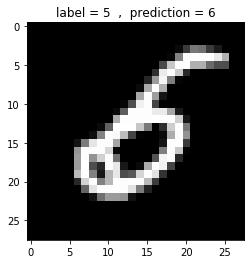

In [18]:
# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'false_data_실습8'
save_dir_name = algorithm_name + '_' + str(now.year) + str(now.month) + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

os.chdir(curr_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)